# Neural Networks for Regression via Keras


### What is nonlinear regression?

Given $X$ and $Y$ data, find a function $F$ that best explains the relationship between $X$ and $Y$, i.e., find $F$ such that $Y \approx F(X)$. Regression is the act of finding a suitable $F$. When $F$ is restricted to be linear, you are performing linear regression. It is the multivariate form of your familiar question: "fit the best line to given data". When $F$ can be nonlinear, finding that function $F$ is called nonlinear regression.

Given: $({X}_1, {Y}_1), \ldots, ({X}_n, {Y}_n)$. 

Objective: Find $F$ that minimizes the error between $Y$ and $F(X)$ on the data, i.e., solve
$$ \underset{F}{\text{minimize}}\ \ \frac{1}{n}\sum_{i=1}^n \| {Y}_i - F({X}_i) \|^2. $$

**Exercise.** Compare it with linear regression. What are your parameters when you try to fit a line to a dataset of the form $(x_1, y_1), \ldots, (x_n, y_n)$, where all $x$'s and $y$'s are scalars?

 
### What is a neural network and how can it do nonlinear regression?
A neural network defines a sequence of operations on the input that produces an output. In the above diagram, your data $X$ goes through the neural network to produce the output $Y$. What does each layer represent? With the output of the last layer, it performs an affine transformation and then passes it through an **activation function** to compute the output of the current layer.

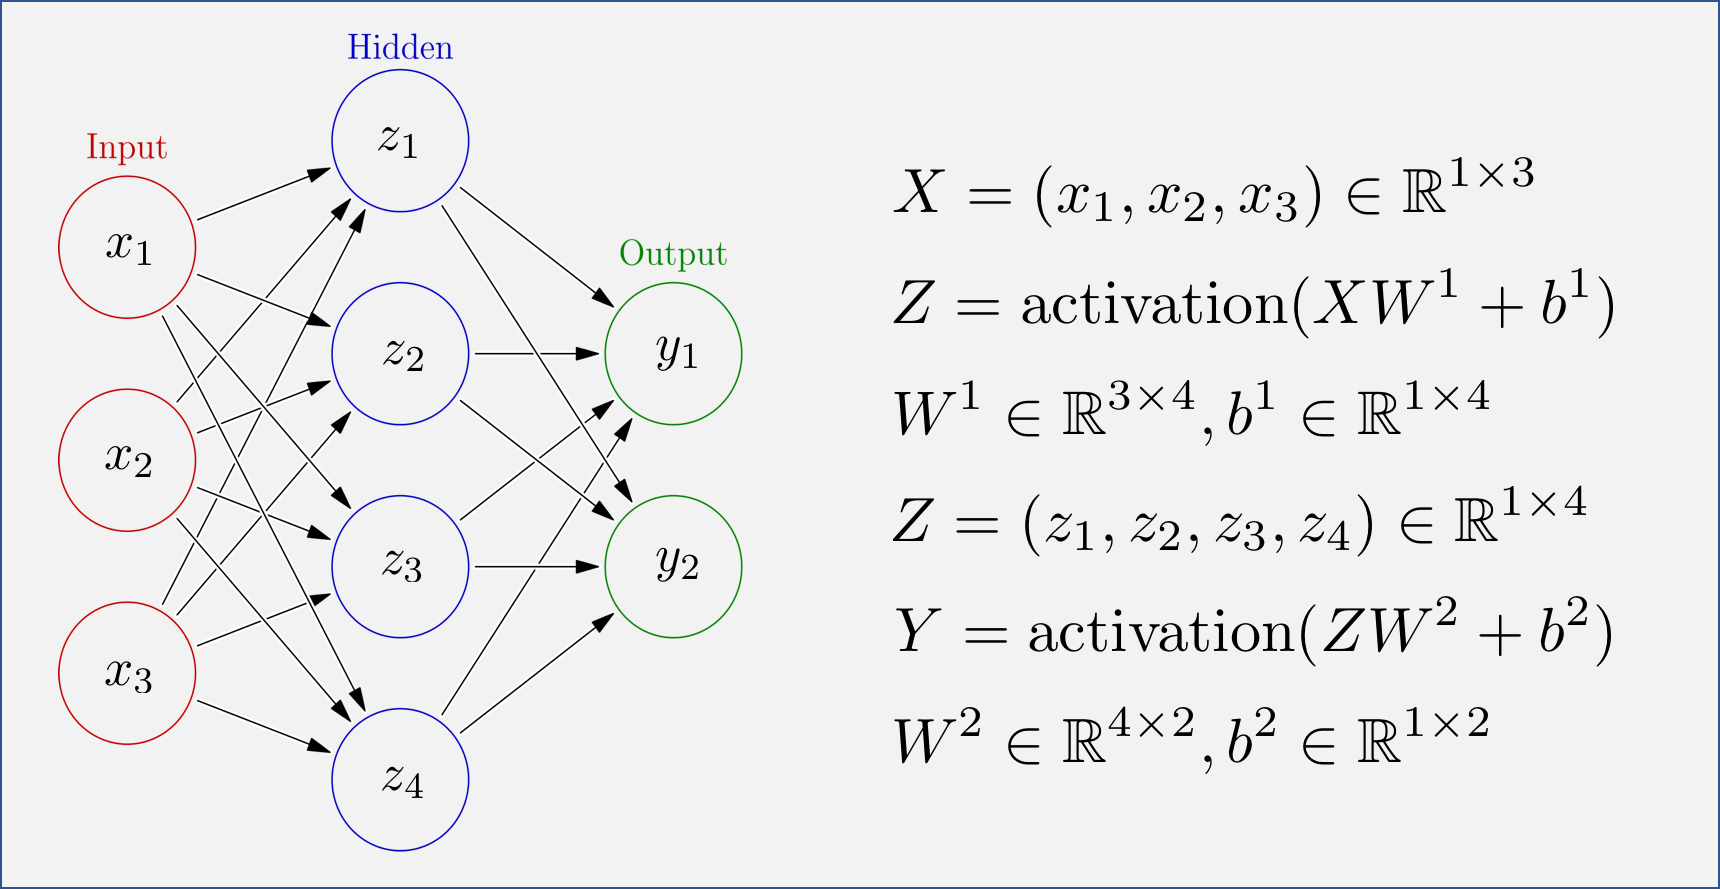
In essence, a neural network **parameterizes** the function $F$ in terms of the weights and biases in the neural network. In the above figure, the parameters are given by
$$\theta := ( W^1, b^1, W^2, b^2 ).$$
Call this parametric representation $F_\theta$. Then, the nonlinear regression via a neural network seeks $\theta$ that solves
$$ \underset{\theta}{\text{minimize}}\ \ J(\theta) := \frac{1}{n}\sum_{i=1}^n \| {Y}_i - F_\theta({X}_i) \|^2. $$



### How does a neural network optimize over $\theta$?

There are a variety of optimization routines that one can use, the simplest among them is **stochastic gradient descent**. You sample one among your $n$ data points and sequentially update the parameters in $\theta$ as follows. 
$$ \theta_{k+1} := \theta_{k} - \alpha_k \nabla_\theta \| {Y}_i - F_\theta({X}_i) \|^2, $$
starting from a possibly random initial parameter vector $\theta_0$. Here, $\alpha$'s define a sequence of stepsizes, and $\nabla J$ stands for the (sub)gradient of $J$.

1. Can you update $\theta$ using a batch of gradients computed on a batch of data? 
2. Can you have different step-sizes for different parameters within $\theta$?
4. How fast does it converge?

Machine learning research has focussed on each of these questions both using theoretical analysis and extensive simulation studies.


### In the parametric description of $F$, what is an activation function?

Without activation function, the output of the neural network is a linear function of $X$. To understand that statement, assume in the above network that activation function is identity, and therefore, we have $Z = X W^1 + b^1$, and 
$$ Y = Z W^2 + b^2 = ( X W^1 + b^1 ) W^2 + b^2 = X (W^1 W^2) + b^1 W^2 + b^2, $$
a linear function of $X$. Utilizing the same logic, you can show that no matter how many layers you have or how many neurons you have in these layers, the output of a neural network is linear in $X$ without an activation function. You need a nonlinear activation function to learn complicated nonlinear functions.

# Example: Nonlinear regression via Tensorflow.

Construct $n=1000$ data points $({X}_1, {Y}_1), \ldots ({X}_n, {Y}_n)$, where ${Y}_i = F({X}_i)$. Obtain the ${X}$'s by sampling uniformly between -5 and 5, n times.

Start with the customary imports.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.0.0


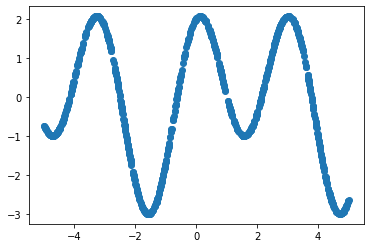

In [2]:
# Prepare training data in Xbar and Ybar.

n = 1000
trainX = np.random.uniform(-5, 5, size=[n, 1]).astype(np.float32)
F = lambda x: np.sin(x) + 2 * np.cos(2 * x)
trainY = np.array([F(x) for x in trainX]).astype(np.float32)

# Draw a scatter plot of the sampled points.
plt.figure(1)
plt.scatter(trainX, trainY)
plt.show()

Create a data set of $m=200$ points from $[-5, 5]$ on which you will test the accuracy of the regressor. Always keep the training and testing data different. If you don't and you seek to minimize training error, you may **overfit** your regressor to your training samples. Overfitting means that you fit the regressor so well on the training set, that it starts to perform way worse on samples it has never seen before. That is, your learnt function does not accurately capture the true relationship between $X$ and $Y$. 

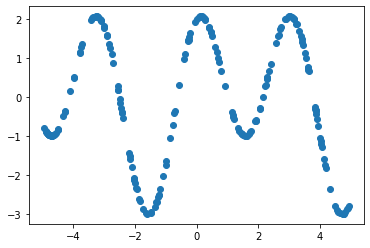

In [3]:
m = 200
testX = np.random.uniform(-5, 5, size=[m, 1]).astype(np.float32)
testY = np.array([F(x) for x in testX]).astype(np.float32)

plt.figure(1)
plt.scatter(testX, testY)
plt.show()

### Neural network via Keras

Keras is a user-friendly framework to define, train and test neural networks. Check their page out for more details. https://keras.io/ 

In [21]:
# Define the structure of the neural network via Keras

nHidden = 8

inputs = keras.Input(shape=(1,), name="input")
nn_layer = keras.layers.Dense(nHidden, activation="tanh", name="dense_1", use_bias=True, bias_initializer='zeros')(inputs)
nn_layer = keras.layers.Dense(nHidden, activation="tanh", name="dense_2", use_bias=True, bias_initializer='zeros')(nn_layer)
# nn_layer = keras.layers.Dense(nHidden, activation="tanh", name="dense_3", use_bias=True, bias_initializer='zeros')(nn_layer)
outputs = keras.layers.Dense(1, name="output")(nn_layer)

model = keras.Model(inputs=inputs, outputs=outputs)

# Define the optimization algorithm for training and the loss metric to minimize
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01), # Optimizer
    loss=keras.losses.MeanSquaredError() # Loss metric
)

The activation function used here is 'relu'. Other commonly used  activation functions are sigmoid, softmax, tanh, etc. Check them out: https://keras.io/api/layers/activations/ 

Are there other optimizers? SGD, Adam, Adagrad, RMSProp, etc. https://keras.io/api/optimizers/ 

What is learning rate?

Fit model on training data
Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 0s 36us/sample - loss: 0.0021
Epoch 2/100
1000/1000 [==============================] - 0s 16us/sample - loss: 0.0041
Epoch 3/100
1000/1000 [==============================] - 0s 17us/sample - loss: 0.0028
Epoch 4/100
1000/1000 [==============================] - 0s 16us/sample - loss: 0.0023
Epoch 5/100
1000/1000 [==============================] - 0s 17us/sample - loss: 0.0022
Epoch 6/100
1000/1000 [==============================] - 0s 16us/sample - loss: 0.0020
Epoch 7/100
1000/1000 [==============================] - 0s 16us/sample - loss: 0.0026
Epoch 8/100
1000/1000 [==============================] - 0s 16us/sample - loss: 0.0027
Epoch 9/100
1000/1000 [==============================] - 0s 15us/sample - loss: 0.0036
Epoch 10/100
1000/1000 [==============================] - 0s 16us/sample - loss: 0.0027
Epoch 11/100
1000/1000 [==============================] - 0s 16us/sample - loss:

1000/1000 [==============================] - 0s 16us/sample - loss: 0.0020
Epoch 94/100
1000/1000 [==============================] - 0s 16us/sample - loss: 0.0019
Epoch 95/100
1000/1000 [==============================] - 0s 16us/sample - loss: 0.0021
Epoch 96/100
1000/1000 [==============================] - 0s 16us/sample - loss: 0.0018
Epoch 97/100
1000/1000 [==============================] - 0s 16us/sample - loss: 0.0018
Epoch 98/100
1000/1000 [==============================] - 0s 16us/sample - loss: 0.0021
Epoch 99/100
1000/1000 [==============================] - 0s 15us/sample - loss: 0.0024
Epoch 100/100
1000/1000 [==============================] - 0s 16us/sample - loss: 0.0019


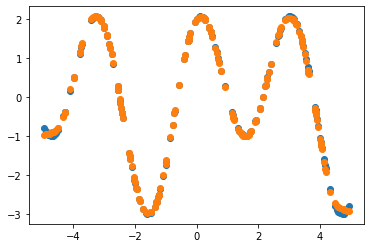

In [31]:
# Train the model

print("Fit model on training data")
history = model.fit(
    trainX,
    trainY,
    batch_size=50,
    epochs=100
)

# Output the accuracy of the regressor on the test data.

predictions = model.predict(testX)

plt.figure(1)
plt.scatter(testX, testY)
plt.scatter(testX, predictions)
plt.show()